In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import random
import seaborn as sb


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Q. (10 p) Fashion mnist veri setini yükle

In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX=np.reshape(trainX,(-1,28*28))
testX=np.reshape(testX,(-1,28*28))

Q. (10 p)10 tane karar ağacı içeren random forest modelini eğitin. (5 p) Her bir ağaç için maksimum derinliği 3 olarak alın. (5 p)Eğitim ve test veri setinde precision, recall, f1 score ve (5 p) accuracy ölçütlerini hesaplayın.


In [0]:
# ==== Random Forest modelini optimum parametre degerlerini kullanmaksizin egit ========
rf = RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(trainX, trainY)
# Egitim veriseti icin tahminde bulun 
y_pred_train = rf.predict(trainX)
# Test veriseti icin tahminde bulun 
y_pred_test = rf.predict(testX)
# Egitim veri seti icin performans olcutlerini yazdir. 
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= trainY, y_pred= y_pred_train))
# Test veri seti icin performans olcutlerini yazdir. 
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= testY, y_pred= y_pred_test))



Training metrics:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6000
           1       0.76      0.94      0.84      6000
           2       0.38      0.90      0.53      6000
           3       0.68      0.68      0.68      6000
           4       0.42      0.08      0.14      6000
           5       0.91      0.65      0.76      6000
           6       0.42      0.00      0.01      6000
           7       0.71      0.88      0.79      6000
           8       0.88      0.83      0.85      6000
           9       0.79      0.89      0.83      6000

    accuracy                           0.67     60000
   macro avg       0.66      0.67      0.62     60000
weighted avg       0.66      0.67      0.62     60000

Test data metrics:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.76      0.93      0.83      1000
           2       0.38      0.91      0.

In [0]:
sklearn.metrics.accuracy_score(testY,  y_pred_test)

0.6668

Q. (20 p) Random forest modelininin sınıflandırma için kullandığı özniteliklerin(features) önem derecelerini grafik olarak cizdiriniz. 

In [0]:
importances = rf.feature_importances_

Feature ranking:
1. feature 96 (0.056006)
2. feature 574 (0.055081)
3. feature 234 (0.028532)
4. feature 152 (0.028309)
5. feature 370 (0.027343)
6. feature 94 (0.026932)
7. feature 150 (0.026770)
8. feature 577 (0.026644)
9. feature 263 (0.026348)
10. feature 178 (0.026209)
11. feature 233 (0.024028)
12. feature 120 (0.023597)
13. feature 658 (0.021795)
14. feature 538 (0.020599)
15. feature 509 (0.019592)
16. feature 179 (0.019349)
17. feature 498 (0.019328)
18. feature 454 (0.019036)
19. feature 527 (0.018745)
20. feature 173 (0.018382)
21. feature 247 (0.017267)
22. feature 175 (0.017264)
23. feature 343 (0.016677)
24. feature 229 (0.016505)
25. feature 341 (0.015805)
26. feature 600 (0.015205)
27. feature 602 (0.015117)
28. feature 315 (0.014808)
29. feature 350 (0.014598)
30. feature 580 (0.014075)
31. feature 599 (0.014018)
32. feature 147 (0.013722)
33. feature 202 (0.013374)
34. feature 627 (0.013363)
35. feature 625 (0.013258)
36. feature 334 (0.012799)
37. feature 695 (0.012

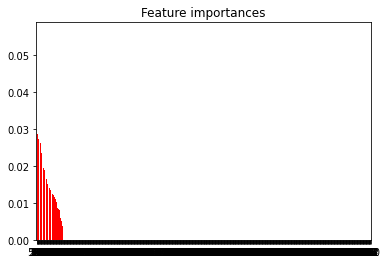

In [0]:
import matplotlib.pyplot as plt
# Random forest icindeki her bir karar agaci icin, ozniteliklerin 
# onem derecelerini elde et ve her bir ozellik icin tum karar agaclari
# tarafindan verilen onemin standard sapmasini hesapla. 
# (Bu adim secmelidir. Ozniteliklerin onem derecesini bulmak 
# icin zorunlu degildir. )
# Not: Bir onceki adimda (yani "importances = rf.feature_importances_" 
# kodu ile tanimli satirda), 
# ozniteliklerin onem derecesi, random foresttaki tum agaclar 
# toplu olarak dikkate alinarak hesaplanmisti.

std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)

#ozniteliklerin onem derecelerini buyukten kucuge dogru sirala
indices = np.argsort(importances)[::-1]

# ozniteliklerin onem derecelerini yazdir
print("Feature ranking:")

for f in range(trainX.shape[1]):
    if importances[indices[f]]>0:
      print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# ozniteliklerin onem derecelerini cizdir
plt.figure()
plt.title("Feature importances")
plt.bar(range(trainX.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(trainX.shape[1]), indices)
plt.xlim([-1, trainX.shape[1]])
plt.show()


Q. (10 p) Random forest modeli için en başarılı performansı veren parametre değerlerini bulmak için grid search metodunu kullanın (GridSearchCV). Bu metotta, (5 p) karar ağaçlarının sayısı için [10,50], (5 p)  her bir yapraktaki minimum örnek sayısı için [2,3] ve (5 p)  maksimum derinlik icin [3,10] aralığındaki değerleri kullanınız. (5 p) Eğitim ve test veri setinde precision, recall, f1 score ve (5 p) accuracy ölçütlerini hesaplayın.

In [0]:
# Gridsearch metodu ile, random forest modelinin parametreleri olan, 
# karar agaci sayisi, her bir yapraktaki minimum ornek sayisi ve
# karar agaclarinin derinligi degiskenlerine, optimum degerin aranmak
# istendigi deger araligini giriniz. 'n_estimators':[10,50] gibi, 
# 

clf = GridSearchCV(rf, param_grid={'n_estimators':[10,50],...
                                  'min_samples_leaf':[2,3],'max_depth':[3,10]})
# Gridsearch metodunda girilen deger araliklarindaki parametre degerlerine sahip
# her model icin, ayni egitim verisetini kullanarak egitim yapiniz. 

model = clf.fit(trainX, trainY)


y_pred_train = model.predict(trainX)
y_pred_test = model.predict(testX)
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= trainY, y_pred= y_pred_train))
    

y_pred_test = model.predict(testX)
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= testY, y_pred= y_pred_test))

Training metrics:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6000
           1       1.00      0.96      0.98      6000
           2       0.77      0.77      0.77      6000
           3       0.85      0.93      0.89      6000
           4       0.72      0.84      0.78      6000
           5       0.99      0.95      0.97      6000
           6       0.81      0.59      0.68      6000
           7       0.91      0.94      0.92      6000
           8       0.98      0.98      0.98      6000
           9       0.93      0.95      0.94      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000

Test data metrics:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.94      0.96      1000
           2       0.70      0.73      0.

In [0]:
sklearn.metrics.accuracy_score(testY,  y_pred_test)

0.8417

Q. (10 p) Random forest modeli için, grid search metodunu kullanarak bulduğunuz en iyi sonuç veren parametre değerlerini yazdırınız.

In [0]:
model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 50}